In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn import metrics

In [ ]:
#importing dataset
hdata = pd.read_csv("/content/kc_house_data.csv")

In [ ]:
hdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
hdata.shape

(21613, 21)

In [ ]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#check if data is null
hdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
print('Sqft above:--')
print('Mean',hdata['sqft_above'].mean())
print('Median',hdata['sqft_above'].median())
print('Mode',hdata['sqft_above'].mode()[0])

Sqft above:--
Mean 1788.396094581463
Median 1560.0
Mode 1300.0


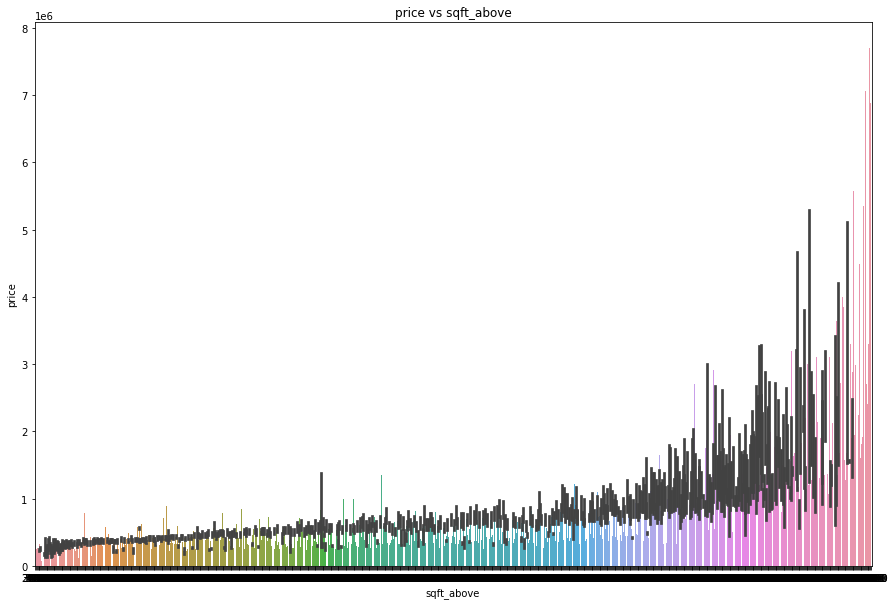

In [ ]:
# barplot for analysing how the price is changing with the squareft(above)
fig,axes= plt.subplots(nrows =1, ncols=1,figsize =(15,10))
plt.title("price vs sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('price')
sns.barplot(x='sqft_above', y='price',data = hdata)

As we can see, in the above data, the "sqft_above" field contains null values, so we have to replace those null values.

In [ ]:
# checking skewness of "sqft_above" field
print('The skewness of the variable sqft_above is',hdata['sqft_above'].skew())

The skewness of the variable sqft_above is 1.4465844307473874


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


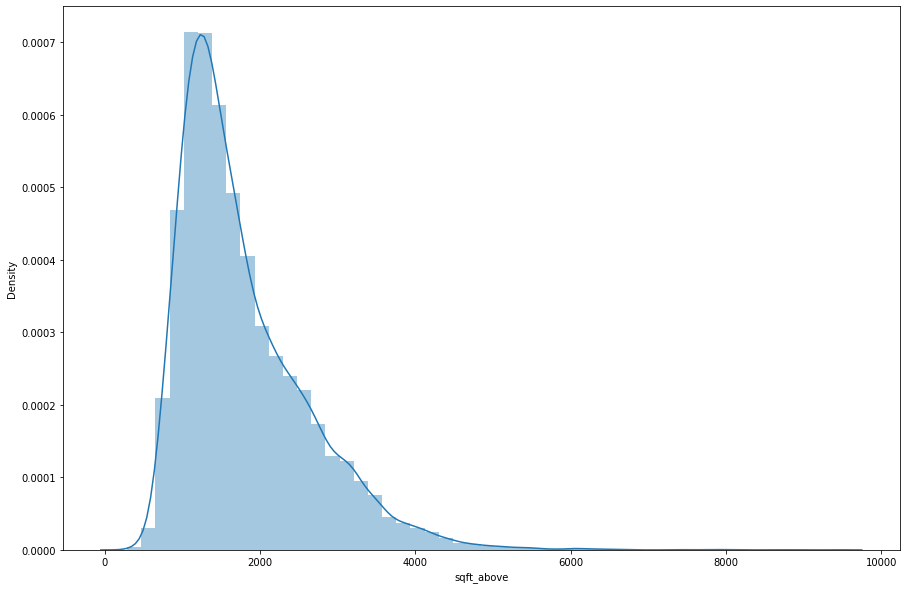

In [ ]:
fig , axes = plt.subplots(nrows = 1 , ncols = 1, figsize =( 15, 10))
sns.distplot( hdata['sqft_above'], hist = True , kde =True, rug = False , label = 'sqft above', norm_hist =True)

 The above figure shows that the "sqft_above" field is right-skewed, so we have to remove the skewness by applying logarithmic transformation using numpy's log1p method

In [ ]:
hdata["sqft_above"] = np.log1p(hdata["sqft_above"])

In [ ]:
# checking skewness of "sqft_above" field again
print('The skewness of the variable sqft_above is',hdata['sqft_above'].skew())

The skewness of the variable sqft_above is 0.2540603614246472


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


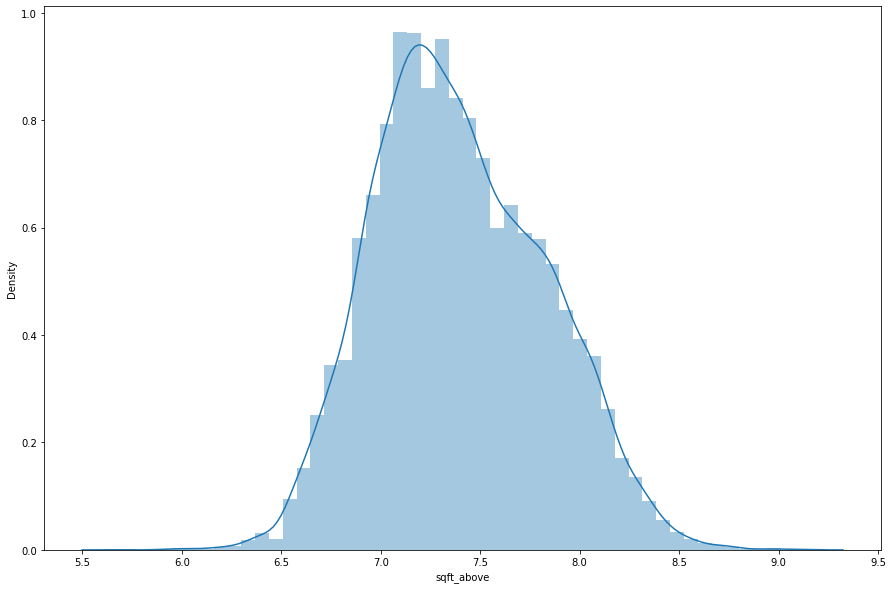

In [ ]:
fig , axes = plt.subplots(nrows = 1 , ncols = 1, figsize =( 15, 10))
sns.distplot( hdata['sqft_above'], hist = True , kde =True, rug = False , label = 'sqft above', norm_hist =True)

In [ ]:
# replacing null values
hdata['sqft_above']=hdata['sqft_above'].fillna(hdata['sqft_above'].median())

In [ ]:
# check if data is null again
hdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
print('The skewness of the the dataset is',hdata.skew())

The skewness of the the dataset is id                0.243329
price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        0.254099
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
hdata = hdata.drop('date',axis = 1)
hdata = hdata.drop('id',axis = 1)
hdata = hdata.drop('zipcode',axis = 1)

In [ ]:
col = hdata[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15']]

        

In [ ]:
for c in  col:
  hdata[c] = np.log1p(hdata[c])

In [ ]:
print('The skewness of the the dataset is',hdata.skew())

The skewness of the the dataset is price             2.335779
bedrooms         -0.827991
bathrooms        -0.594711
sqft_living      -0.324027
sqft_lot         -0.367540
floors            0.340624
waterfront       12.841556
view              3.075358
condition         0.297658
grade            -0.062190
sqft_above        0.025017
sqft_basement     0.447173
yr_built         -0.422099
yr_renovated      4.611240
lat              -0.497136
long              0.620519
sqft_living15    -0.012181
sqft_lot15       -0.459797
dtype: float64


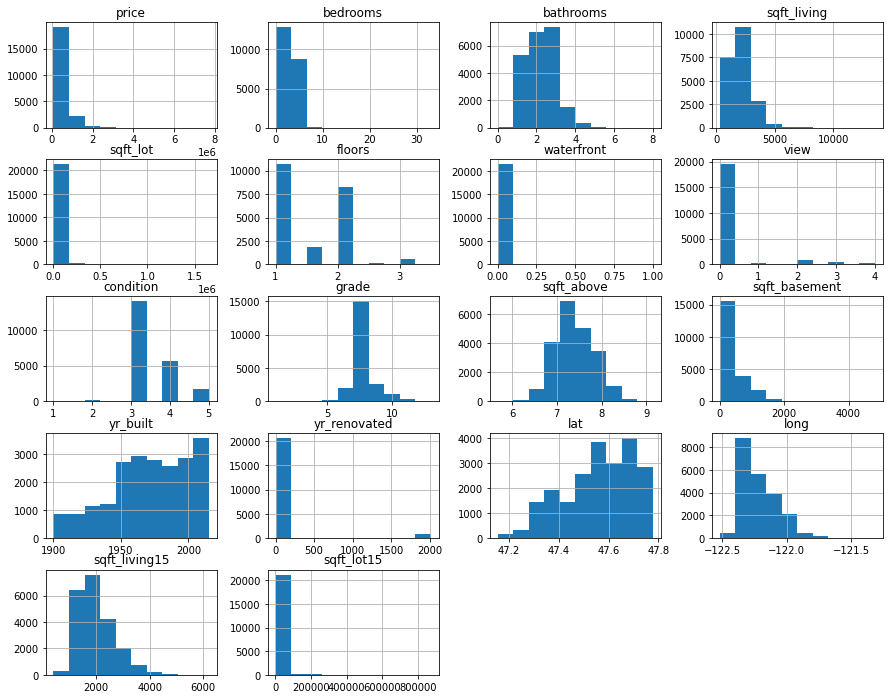

In [ ]:
hdata.hist(figsize=(15,12))
plt.show()

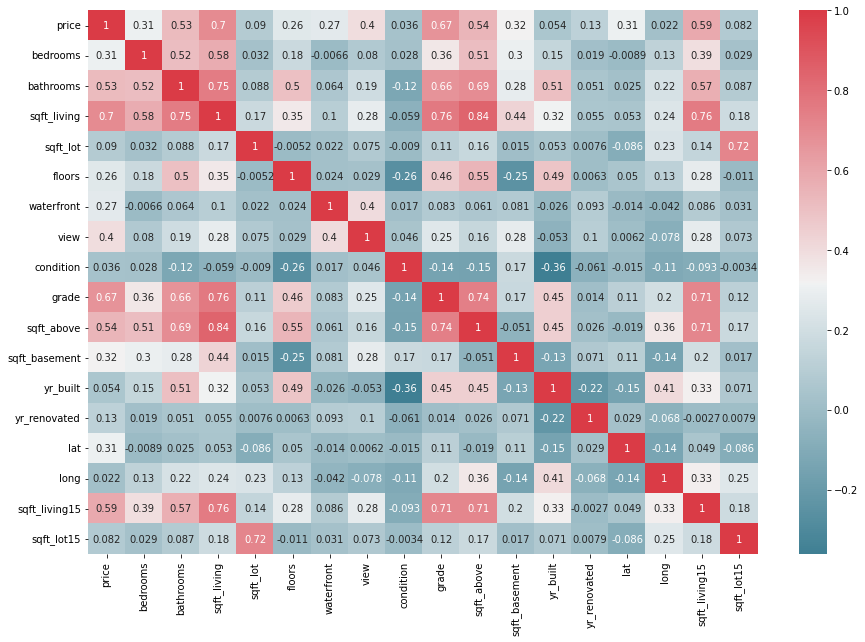

In [ ]:
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(hdata)

In [ ]:
hdata.shape

(21613, 18)

In [ ]:
hdata['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


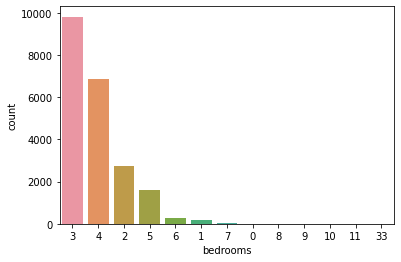

In [ ]:
sns.countplot(hdata.bedrooms, order = hdata['bedrooms'].value_counts().index)

In [ ]:
#removes entries with z-score above 3 for specific columns
def remove_outliers(hdata):
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        hdata = hdata[np.abs(hdata[variable]-hdata[variable].mean()) <= (3*hdata[variable].std())]
        
    return hdata

In [ ]:
originalsize = len(hdata)
hdata = remove_outliers(hdata)
newsize = len(hdata)
print(originalsize)
print(newsize)

20145
19533


In [ ]:
print((originalsize-newsize)/originalsize*100)

3.0379746835443036


# Test train split

In [ ]:
X = hdata.drop('price',axis =1)
y= hdata['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
3771,3,2.50,2780,8225,2.0,0,1,3,9,7.930566,0,1990,0,47.3509,-122.323,720,9736
6360,3,2.50,3060,7831,2.0,0,2,3,9,8.026497,0,2004,0,47.5401,-121.861,3140,7438
6105,1,1.00,1160,64469,1.0,0,0,3,7,7.057037,0,2009,0,47.7433,-122.082,1580,48352
15087,2,1.50,1160,8060,1.0,0,0,4,7,7.057037,0,1950,0,47.5146,-122.386,1500,8060
17464,3,1.75,1580,9049,1.0,0,0,3,8,7.365813,0,1966,0,47.7776,-122.375,2100,8446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,2,2.25,1460,1607,2.0,0,0,3,8,7.286876,0,2007,0,47.5395,-122.369,1460,1826
8591,4,2.50,2590,8483,2.0,0,0,3,9,7.859799,0,1991,0,47.7380,-122.221,2660,8717
19018,3,2.00,1100,5200,1.0,0,0,3,6,7.003974,0,1969,2014,47.3606,-122.083,1050,5330
19219,3,2.50,1330,2183,3.0,0,0,3,8,7.193686,0,2014,0,47.6987,-122.365,1310,5000


In [ ]:
y_train

3771     449900.0
6360     650000.0
6105     440000.0
15087    365000.0
17464    389950.0
           ...   
6127     309950.0
8591     570000.0
19018    225000.0
19219    539950.0
14103    405000.0
Name: price, Length: 15108, dtype: float64

# Data prepared

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:

print('Linear Regression Model-->')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared training',round(reg.score(X_train,y_train),3))
print('R squared testing',round(reg.score(X_test,y_test),3))

Linear Regression Model-->
MAE: 106108.58903050856
MSE: 24498524498.41247
RMSE: 156520.04503708932
R squared training 0.689
R squared testing 0.682


# Using DNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# having 17 neuron is based on the number of available features
from keras.layers import Dropout
from keras import regularizers
model = Sequential()
model.add(Dense(17,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape = (17,)))
model.add(Dense(17,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(17,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(17,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer='Adam',loss='mes')

In [ ]:
model.compile(optimizer='adam',loss = "binary_crossentropy", metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model.fit(X_train, y_train,batch_size = 17, epochs=10, validation_data=[X_test, y_test])

Epoch 1/10
889/889 [==============================] - 4s 3ms/step - loss: -439788578537472.0000 - accuracy: 0.0000e+00 - val_loss: -2812065949417472.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
889/889 [==============================] - 2s 2ms/step - loss: -29388195611279360.0000 - accuracy: 0.0000e+00 - val_loss: -84921407636504576.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
889/889 [==============================] - 2s 2ms/step - loss: -258897020830351360.0000 - accuracy: 0.0000e+00 - val_loss: -512496766436769792.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
889/889 [==============================] - 2s 3ms/step - loss: -1052310830546157568.0000 - accuracy: 0.0000e+00 - val_loss: -1775711416297193472.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
889/889 [==============================] - 2s 3ms/step - loss: -3171550911046615040.0000 - accuracy: 0.0000e+00 - val_loss: -4843422937388154880.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
889/889 [==============================] - 2s 2ms/step - loss:

In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics
mean_square_error=metrics.mean_squared_error(y_test,y_pred)
print("Using DNN-->")
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Using DNN-->
MSE: 332427804881.4318
RMSE: 576565.5252279934


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn import metrics
print("Using Decision Tree-->")
housing_predictions = tree_reg.predict(X_train)
tree_mse = metrics.mean_squared_error(y_train, housing_predictions)
print('MSE:', tree_mse)  
tree_rmse = np.sqrt(tree_mse)
print('RMSE:',tree_rmse)

Using Decision Tree-->
MSE: 79383464.29560497
RMSE: 8909.739855663855


# Conclusion:-
we have predicted the house price using three different ML model algorithms.
The RMSE of our Linear Regression is around 156520, so this model had room for improvement. Then we got an RMSE score of 8909 with Decision Tree Learning model.
Also, notice that RMSE (loss function) is lower for Decision Tree Learning model which shows that our prediction is closer to actual rating price.